# Exploratory Data Analysis

I will now proceed with a more in-depth Exploratory Data Analysis based on the observations made on my preliminary data analysis. Especifically, I will be analyzing in more detail in regards to the hottest and coldest hours as well as the monthly average temperatures for each year.
</br></br>
I will also be analyzing the correlation between the independent variables and the target variable (temperature). This will allow me to plan out the processing steps to begin fitting a baseline model.

In [10]:
import numpy as np
import pandas as pd
import calendar


# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot


In [2]:
df = pd.read_csv('../data/weatherstats_vancouver_hourly_clean.csv')
df.head()

,date_time_local,pressure_station,pressure_sea,wind_dir,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2013-07-01 00:00:00,101.18,101.16,SSE,7,0.0,91,18.2,19.7,0.0,0.0,32200.0,2.9,5.0,19.4,18.5
1,2013-07-01 01:00:00,101.22,101.21,SE,6,0.0,89,17.8,19.6,0.0,0.0,32200.0,3.0,5.0,20.1,18.7
2,2013-07-01 02:00:00,101.26,101.24,E,11,0.0,88,16.7,18.7,0.0,0.0,32200.0,3.0,5.0,19.8,18.0
3,2013-07-01 03:00:00,101.26,101.25,E,4,0.0,84,16.5,19.2,0.0,0.0,32200.0,2.7,5.0,18.5,17.5
4,2013-07-01 04:00:00,101.30,101.28,NNW,5,0.0,87,15.7,17.9,0.0,0.0,32200.0,2.6,5.0,18.8,17.3


In [3]:
# Setting date as index.
df['date_time_local'] = pd.to_datetime(df['date_time_local'], utc=False)
df = df.set_index('date_time_local')
df.head()

,pressure_station,pressure_sea,wind_dir,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
date_time_local,,,,,,,,,,,,,,,
2013-07-01 00:00:00,101.18,101.16,SSE,7,0.0,91,18.2,19.7,0.0,0.0,32200.0,2.9,5.0,19.4,18.5
2013-07-01 01:00:00,101.22,101.21,SE,6,0.0,89,17.8,19.6,0.0,0.0,32200.0,3.0,5.0,20.1,18.7
2013-07-01 02:00:00,101.26,101.24,E,11,0.0,88,16.7,18.7,0.0,0.0,32200.0,3.0,5.0,19.8,18.0
2013-07-01 03:00:00,101.26,101.25,E,4,0.0,84,16.5,19.2,0.0,0.0,32200.0,2.7,5.0,18.5,17.5
2013-07-01 04:00:00,101.30,101.28,NNW,5,0.0,87,15.7,17.9,0.0,0.0,32200.0,2.6,5.0,18.8,17.3


In [4]:
# Confirming index is date.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2013-07-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure_station     87648 non-null  float64
 1   pressure_sea         87648 non-null  float64
 2   wind_dir             87648 non-null  object 
 3   wind_speed           87648 non-null  int64  
 4   wind_gust            87648 non-null  float64
 5   relative_humidity    87648 non-null  int64  
 6   dew_point            87648 non-null  float64
 7   temperature          87648 non-null  float64
 8   windchill            87648 non-null  float64
 9   humidex              87648 non-null  float64
 10  visibility           87648 non-null  float64
 11  health_index         87648 non-null  float64
 12  cloud_okta           87648 non-null  float64
 13  max_air_temp_pst1hr  87648 non-null  float64
 14  min_air_temp_pst1hr  87648 non-null  float64
dtypes

## Highest and Lowest Hourly Temperatures

To begin I will be looking into the weather stats for the hour where the highest and lowest temperatures were recorded in the data set.
- June 29, 2021 15:00, 32.1ºC
- December 27, 2021 05:00, -14.5ºC

In [5]:
df_highlow_temp = df.loc[df['temperature'].isin([32.1, -14.5])]
print(df_highlow_temp.T)

date_time_local     2021-06-29 15:00:00 2021-12-27 05:00:00
pressure_station                 100.48              101.23
pressure_sea                     100.49              101.28
wind_dir                             SE                   E
wind_speed                            8                  18
wind_gust                           0.0                 0.0
relative_humidity                    45                  69
dew_point                          18.8               -19.0
temperature                        32.1               -14.5
windchill                           0.0               -23.0
humidex                            39.0                 0.0
visibility                      16100.0             32200.0
health_index                        5.1                 2.3
cloud_okta                          0.0                 1.0
max_air_temp_pst1hr                32.6               -13.2
min_air_temp_pst1hr                30.9               -15.3


As seen in the max/min_air_temp_pst1hr columns, highest and lowest air temperatures in the past 10 years are 32.6ºC and -15.3ºC. Dew point seems to have been very high on the hottest day and very low on the coldest day.The relationship between dew point and temperature will need to be analyzed further. 
</br></br>
The visibility was very low on the hottest day without any cloud cover. On the cold day, the visibility was very high and there was barely any cloud cover. I will explore the correlation between visibility/health index with temperature.
</br></br>
Another thing to note is that humidex was very high for the hot day and windchill was low on the cold day. I will need to look into when the highest humidex and lowest windchill were recorded in the data set.

## Humidex and Windchill

In [6]:
# Setting a variable for humidex ordered by highest to lowest.
highest_humidex = df.sort_values(by='humidex', ascending=False)

# Setting a variable for windchill ordered by lowest to highest.
lowest_windchill = df.sort_values(by='windchill', ascending=True)

# Printing both values relative to their index (date) and their corresponding temperature.
print(highest_humidex[['humidex', 'temperature']].head(1))
print(lowest_windchill[['windchill', 'temperature']].head(1))

                     humidex  temperature
date_time_local                          
2021-06-28 16:00:00     40.0         31.3
                     windchill  temperature
date_time_local                            
2021-12-27 05:00:00      -23.0        -14.5


The highest humidex was one point higher than the hottest hour, but the lowest windchill does correspond to the coldest hour. These two values may still be indicative of an upcoming high or low temperature. I will explore their correlation later in this EDA.

## Hottest and Coldest Months

In my preliminary EDA I made an observation on the coldest and hottest months. To explore this further I will be plotting the monthly averages separately for each year and include a line for the overall average (all years) for that month.

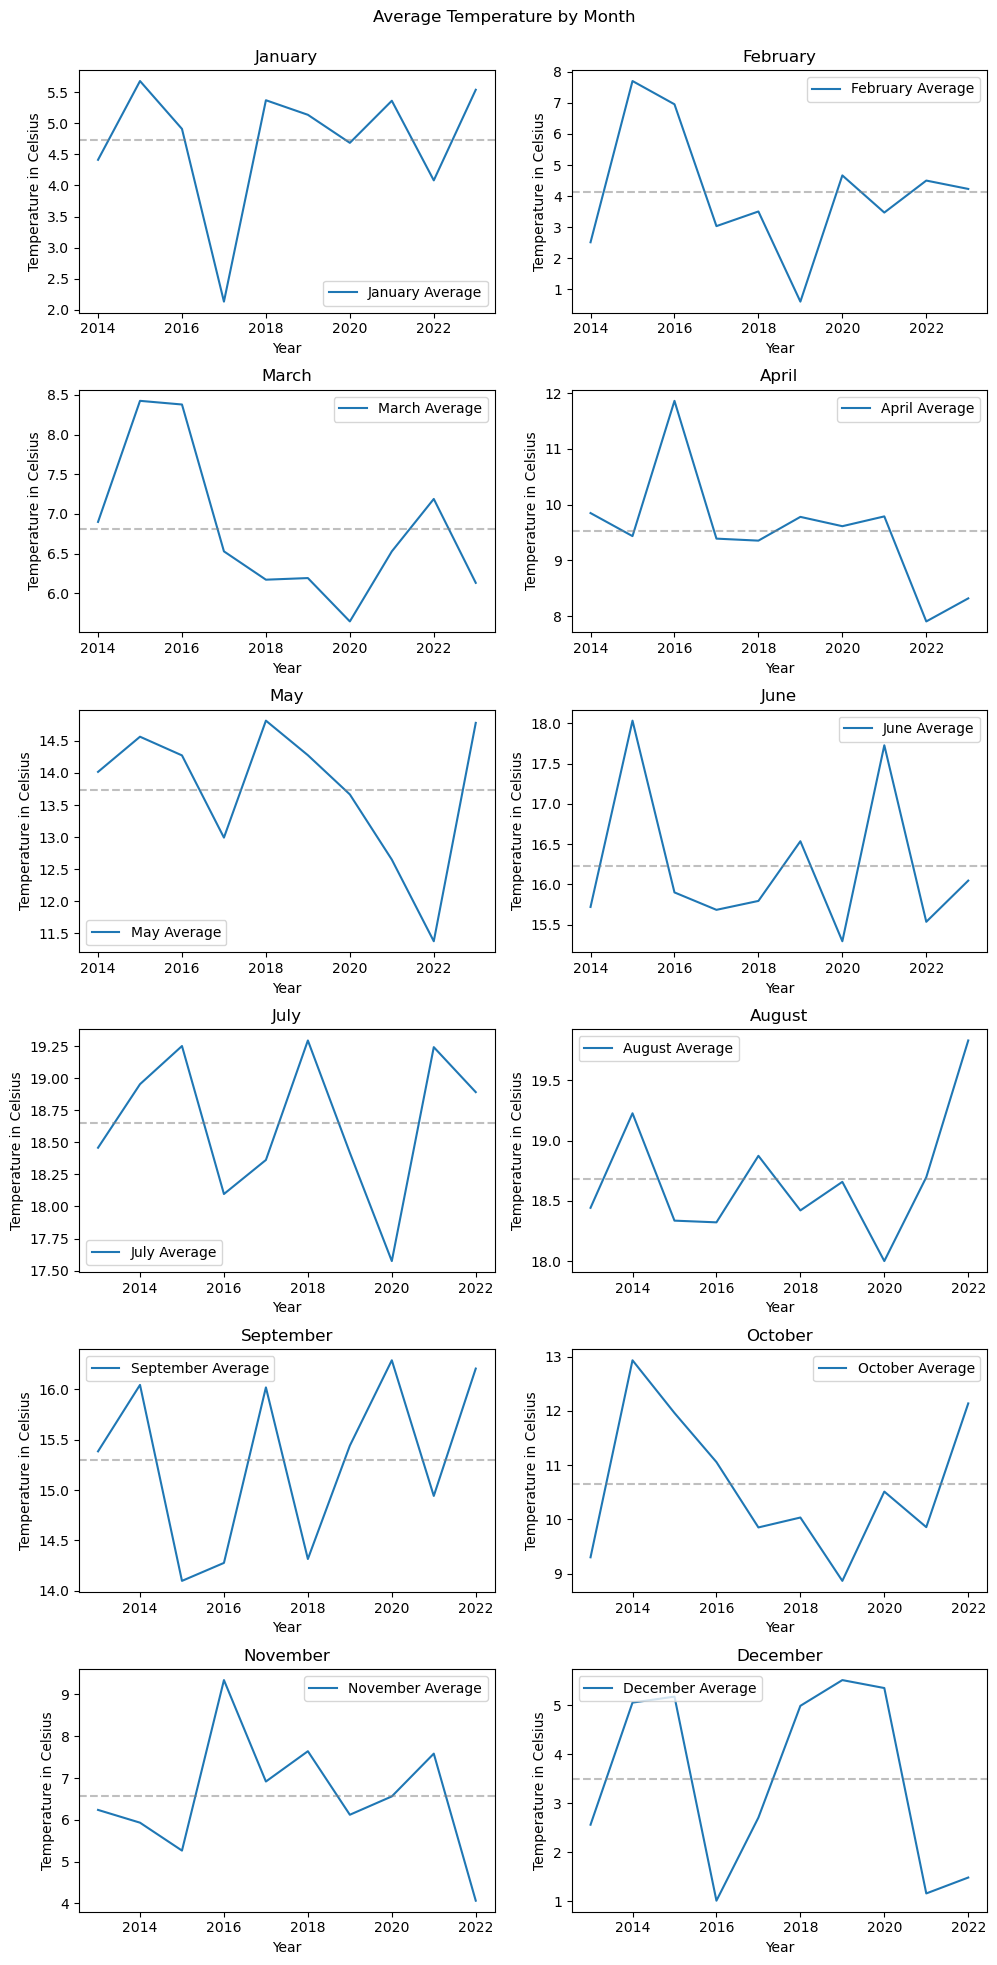

In [7]:
# First I will make a copy of the data frame for this analysis.
df2 = df.copy()

# A column is added for year to allow for easier plotting.
df2['year'] = df2.index.year

# A column for month is also added for the same reason. Note this column changes 1, 2, 3, etc. to January, February, March, etc.
df2['month'] = df2.index.month.map(lambda x: calendar.month_name[x])

# First I create a subplot for all of the months.
fig, axs = plt.subplots(6,2, figsize=(10,20))
fig.suptitle('Average Temperature by Month')


# This for loop runs through the position of each month in the subplot as well as the information for each subplot.
for month in range(1, 13):
    # This is the formula for the axis each subplot will use.
    ax = axs[(month-1)//2, (month-1)%2]
    # This variable stores the month name by running through the for loop.
    month_data = df2[df2['month'] == calendar.month_name[month]]
    # This variable stores the average monthly amount by year.
    month_avg_by_year = month_data.groupby('year')['temperature'].mean()
    # This is the variable for the overall average of the month in all years.
    overall_avg_month = month_avg_by_year.mean()

    # I can now plot a graph for each month.
    ax.plot(month_avg_by_year, label=f'{calendar.month_name[month]} Average')
    ax.axhline(overall_avg_month, color='grey', linestyle='--', alpha=0.5)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature in Celsius')
    ax.set_title(f'{calendar.month_name[month]}')
    ax.legend()

# This keeps the subplot labels from overlapping.
plt.tight_layout()
# This keeps the main title from overlapping with the first two subplots.
plt.subplots_adjust(top=0.95)
plt.show()

- January: 6 out of 10 the month averages have been hotter. 2015 was the hottest. 2017 was the coldest. 
- February: 5 out of 10 the month averages have been colder. 2017 was the coldest. 2015 was the hottest.
- March: 6 out of 10 the month averages have been colder. 2020 was the coldest. 2015 was the hottest.
- April: 4 out of 10 the month averages have been hotter. 2016 was the hottest. 2022 was the coldest.
- May: 5 out of 10 the month averages have been hotter. 2018 and 2023 were the hottest. 2022 was the coldest.
- June: 7 out of 10 the month averages have been colder. 2020 was the coldest. 2015 was the hottest **not 2021** as previously observed.
- July: The monthly averages were split 50/50 on hotter or colder than average. 2015, 2018, and 2021 were the hottest. 2020 was the coldest.
- August: 5 out of 10 the month averages have been colder. 2020 was the coldest. 2022 was the hottest.
- September: Two of the monthly averages were in line with the overall average. The other 8 monthly averages were split 50/50 on hotter or colder than average. 2020 was the hottest, but roughly by half a degree only. 2015 was the coldest.
- October: 6 out of the 10 monthly averages have been colder. 2017 was the coldest. 2014 was the hottest.
- November: 5 out of the 10 monthly averages have been colder. 2022 was the coldest. 2016 was the hottest.
- December: The monthly averages were split 50/50 on hotter or colder than average. 2019 was the hottest, but by less than half a degree. 2016 and 2021 were the coldest.

I wrote the above to get an idea of whether the increase in temperature shows up as a trend on the monthly average. However, this does not seem to be the case. It occurs to me that it is possible that the nighttime weather statistics are skewing the daytime statisticts. As such, I will restrict the monthly averages only on the hours between 06:00 and 18:00.

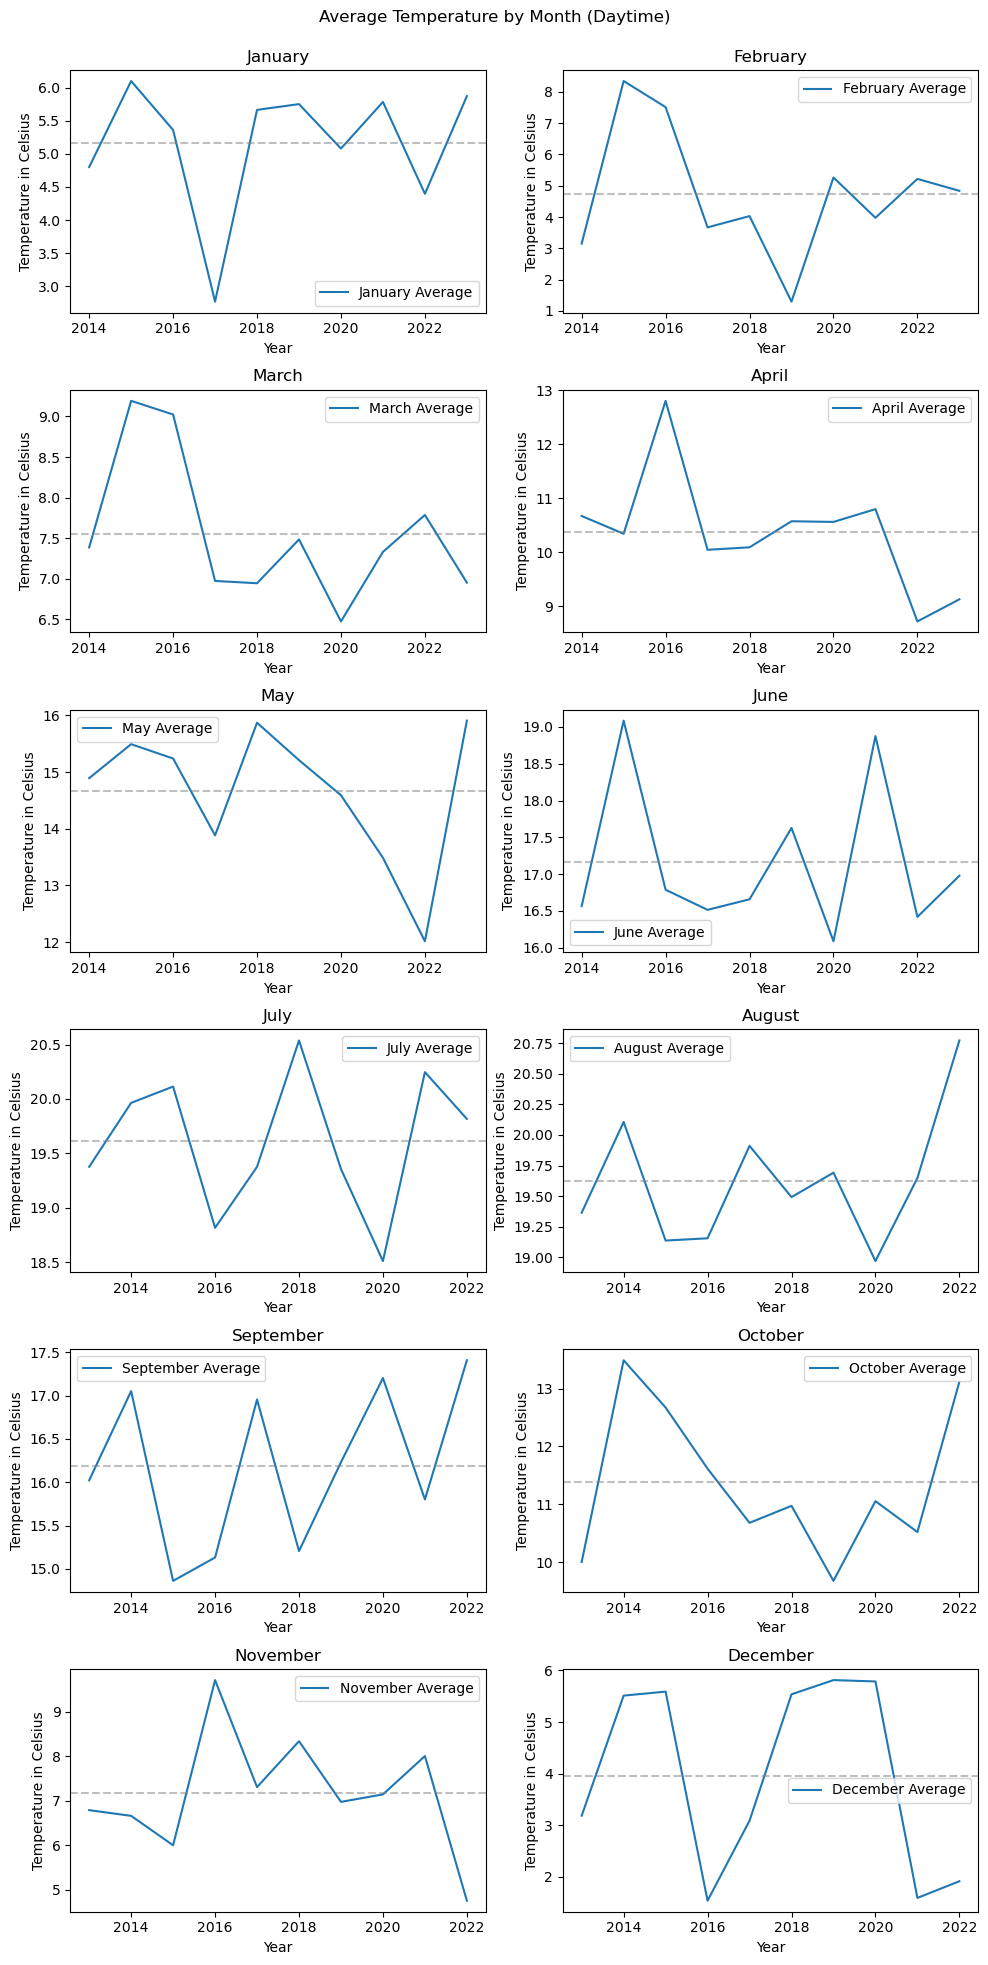

In [8]:
# Filter the original df for only daytime hours (e.g., 6 AM to 6 PM)
daytime_df = df[(df.index.hour >= 6) & (df.index.hour <= 18)]

# Creating a copy of the filtered data for this analysis
df3 = daytime_df.copy()

# Add a column for year
df3['year'] = df3.index.year

# Add a column for month
df3['month'] = df3.index.month.map(lambda x: calendar.month_name[x])

# Subplot for all of the months.
fig2, axs2 = plt.subplots(6, 2, figsize=(10, 20))
fig2.suptitle('Average Temperature by Month (Daytime)')

# For loop to run through the position of each month and their information for each subplot, this time for the daytime hours.
for month in range(1, 13):
    # Setting the axis each subplot will use.
    ax = axs2[(month-1)//2, (month-1)%2]
    # Creating variable to store the month name.
    month_data = df3[df3['month'] == calendar.month_name[month]]
    # Setting variable to store the average monthly amount by year.
    month_avg_by_year = month_data.groupby('year')['temperature'].mean()
    # Setting variable for the overall yearly average per month.
    overall_avg_month = month_avg_by_year.mean()

    # I can now plot a graph for each month.
    ax.plot(month_avg_by_year, label=f'{calendar.month_name[month]} Average')
    ax.axhline(overall_avg_month, color='grey', linestyle='--', alpha=0.5)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature in Celsius')
    ax.set_title(f'{calendar.month_name[month]}')
    ax.legend()

# This keeps the subplot labels from overlapping.
plt.tight_layout()
# This keeps the main title from overlapping with the first two subplots.
plt.subplots_adjust(top=0.95)
plt.show()

Both visualizations above allow me to see the year for each average calculated. The data was skewed when it comes to temperature, but the monthly averages and their respective relation to the overall monthly averages look the same. I will plot the months side by side on a seasonal plot to gain more insight.

C:\Users\pedro\AppData\Local\Temp\ipykernel_32144\2707647710.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df3.resample("MS").mean()


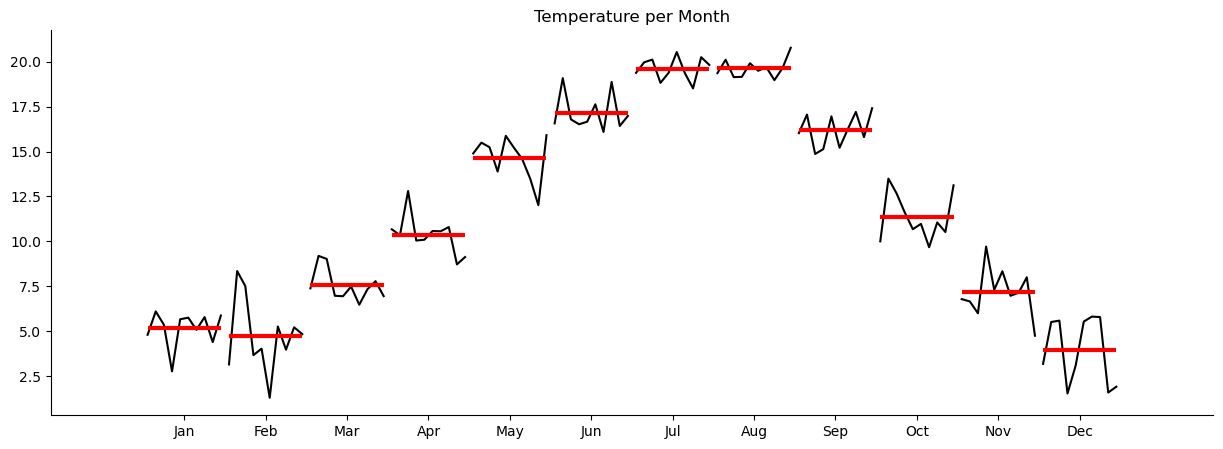

In [11]:
# For this visualization I will use the daytime restricted copy of the data set.
df_monthly = df3.resample("MS").mean()

plt.figure(figsize=(15, 5))

# This will create a seasonal plot.
month_plot(df_monthly["temperature"], ax=plt.gca())

plt.title("Temperature per Month")
sns.despine()
plt.show()

This plot show the seasonality of the year very clearly. The hottest months are July and August, followed closely by June. The coldest months are December, January, and February. This plot also automatically calculates the seasonal mean for each month. This mean is the same as the one calculated in the previous visualization. Something to note here is that despite the record high temperature, June is not the hottest month. On the other hand, the coldest month coincides with the record low temperature.

## Dew Point and Temperature

Next I will look at the relationship between Dew_Point and Temperature by plotting them in a graph along each axis.

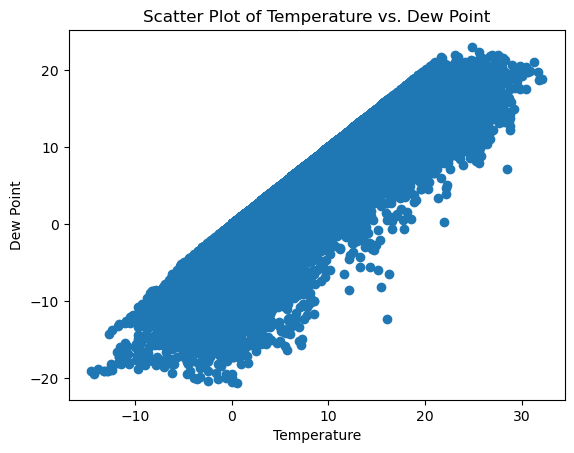

In [12]:
# This code will plot the points for temperature and the corresponding dew point.
plt.scatter(df['temperature'], df['dew_point'])
plt.xlabel('Temperature')
plt.ylabel('Dew Point')
plt.title('Scatter Plot of Temperature vs. Dew Point')
plt.show()

The visualization seems to indicate there is a linear correlation between these two variables. I will explore the correlation in more detail further down this notebook.

## Visibility and Temperature

Next I will visualize a scatter plot graph for visbility and temperature.

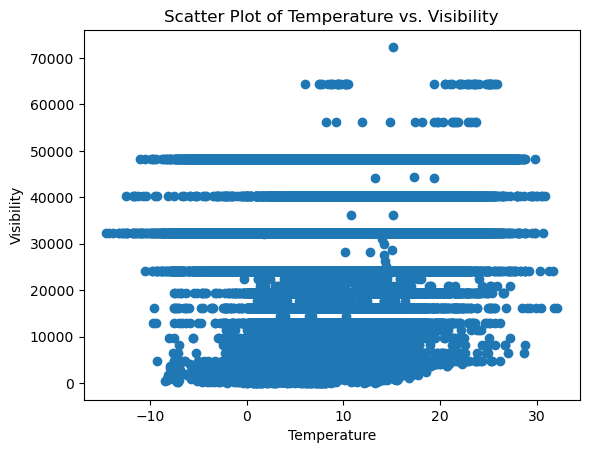

In [13]:
# This code will plot the points for temperature and the corresponding Visibility.
plt.scatter(df['temperature'], df['visibility'])
plt.xlabel('Temperature')
plt.ylabel('Visibility')
plt.title('Scatter Plot of Temperature vs. Visibility')
plt.show()

Temperature can vary regardless of the visibility. These two variables seem to be independent of each other. The visualization does show a cluster of values that could indicate the distribution of visibility. 

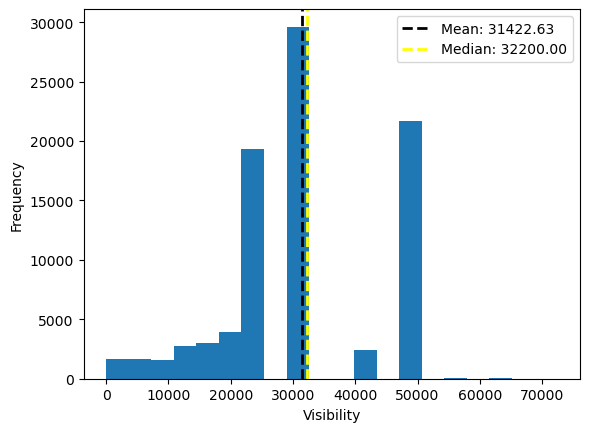

In [14]:
# I am creating the variables for mean and median of visibility first to pass to the graph.
mean_vis = df['visibility'].mean()
median_vis = df['visibility'].median()

# This plot will show the distribution of the values for the visibility column.
plt.hist(df['visibility'], bins=20)
plt.axvline(mean_vis, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_vis:.2f}')
plt.axvline(median_vis, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_vis:.2f}')

# Adding the legend to show the actual values of Mean and Median.
plt.legend()

plt.xlabel('Visibility')
plt.ylabel('Frequency')

plt.show()

The most common visibility is around 30,000, which is roughly the values of the median and mean as well. Visibility is not normally distributed.

## Temperature and Health Index

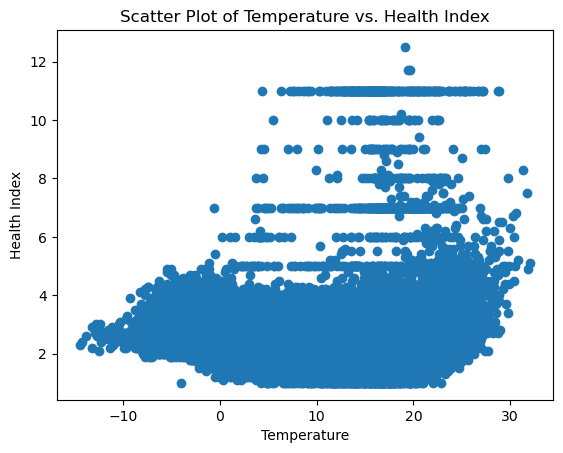

In [15]:
# This code will plot the points for temperature and the corresponding health index.
plt.scatter(df['temperature'], df['health_index'])
plt.xlabel('Temperature')
plt.ylabel('Health Index')
plt.title('Scatter Plot of Temperature vs. Health Index')
plt.show()

Like with visibility, temperature seems to be independent of the health index. The cluster of values could indicate the distribution of the health index column, but we need to plot a histogram to see it more clearly.

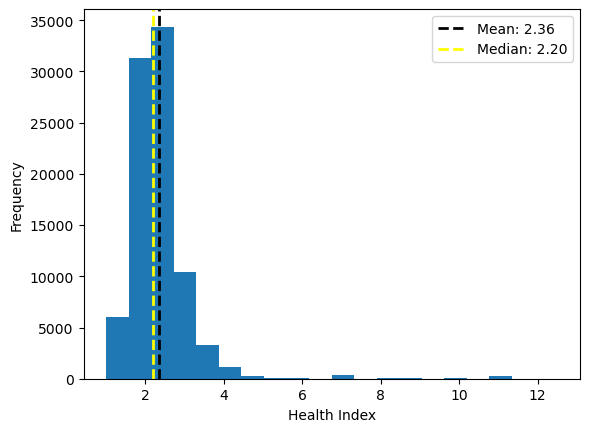

In [16]:
# Saving the variables for health index mean and median.
mean_health = df['health_index'].mean()
median_health = df['health_index'].median()

# Plotting a histogram for health index like I did with visibility.
plt.hist(df['health_index'], bins = 20)
plt.axvline(mean_health, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_health:.2f}')
plt.axvline(median_health, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_health:.2f}')

plt.legend()

plt.xlabel('Health Index')
plt.ylabel('Frequency')

plt.show()

The most common health index value is a little over 2, which is also where the mean and median sit. The health index is normally distributed.

## Multivariate Correlation Analysis

I will now plot a heatmap of the correlations to analyze how each variable affects each other and find the variables that may strongly influence temperature.

C:\Users\pedro\AppData\Local\Temp\ipykernel_32144\3589154541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

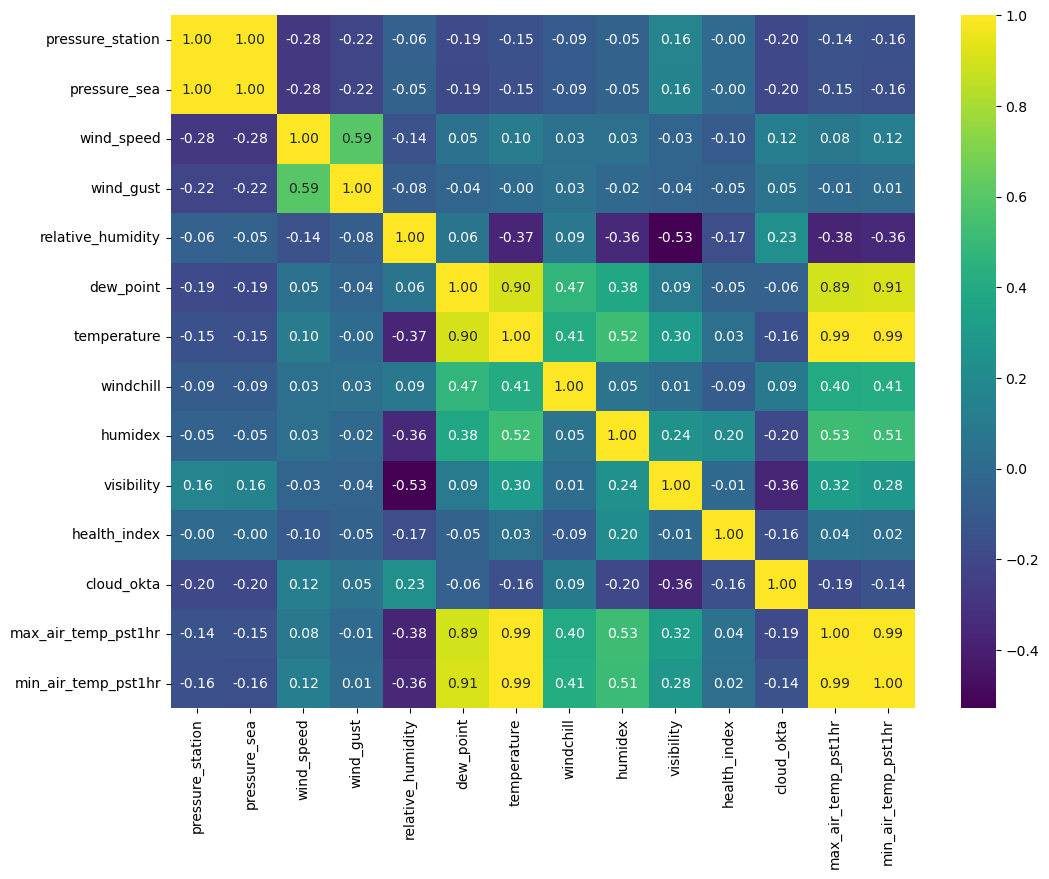

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")

The correlation heatmap above raises a few possible issues with high correlations with some variables. However, it also provides additional insights on how the independent variables affect each other and the target variable (Temperature). Below I will break down the correlations for Temperature.

### Temperature Correlations:
1. Pressure (Station and Sea): -0.15 *
2. Wind Speed: 0.10 *
3. Wind Gust: 0.00 * 
4. Relative Humidity: -0.37
5. Dew Point: 0.90
6. Windchill: 0.41
7. Humidex: 0.52
8. Visibility: 0.30
9. Health Index: 0.03 *
10. Cloud Okta: -0.16 *
11. Min/Max Temp: 0.99 Correlation

The data seems to indicate Pressure (either), Wind Speed, Wind Gust, Health Index, and Cloud Okta (marked with a *) do not have a considerable effect on Temperature. This makes sense for some of the variables like cloud cover, wind, and health index as they can vary independently of Temperature. For pressure, the negative correlation could be an issue, but only if the correlation was not that close to 0. It is likely this low correlation is simply random. Science dictates that the higher the pressure the higher the temperature, but in this data we do not clearly see a linear correlation.
</br>
</br>
The other variables have low, mostly positive, correlation with temperature. Dew point is often close to temperature, so this is likely why there is a high correlation between them. Mininum and Maximum Air Temperature are also highly correlated to the temprature. This is likely because the air temperature values measure the maximum and minimum degrees the air temperature reached in the past hour.

### Correlations between Independent Variables (Higher than 0.25 or lower than -0.25)
#### Relative Humidity Correlations with other Independent Variables:
- Visibility: -0.53
- Min Air Temp: -0.36
- Max Air Temp: -0.38
- Humidex: -0.36
</br></br>
The negative correlation between relative humidity and these 4 variables is low enough that it should not affect our modeling.

#### Wind Speed Correlations with other Independent Variables:
- Wind Gust: 0.59
</br></br>
This is to be expected, wind gust is positively correlated to the wind speed. The higher the wind speed, the higher the probability of wind gust.

#### Cloud Okta:
- Visibility: -0.36
</br></br>
This one also makes sense when considered. The more visibility the less cloud cover. The negative correlation is not very high, but its still important to note this is shown in the data.

#### Dew Point:
- Min Temp: 0.91
- Max Temp: 0.89
</br></br>
Here we have an issue that could affect model training. Considering Dew Point already has a high correlation with Temperature, and Min/Max Air Temperatures are also highly correlated with temperature, I will drop those two variables before training our model. This is to avoid the issue of multicolinearity if these two variables are kept during model training.

## Presure Sea and Pressure Station.

I will be looking into the pressure values a little closer by plotting a histogram like I did previously with Health Index and Visibility.

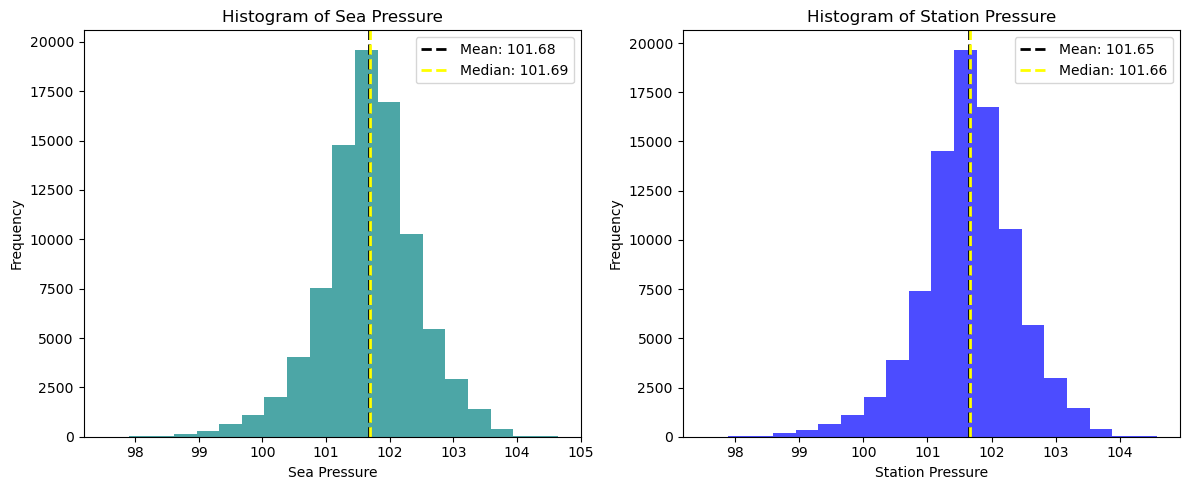

In [18]:
# To keep the code clear, I am assigning the mean and median of each pressure to a variable.
mean_sea_pres = df['pressure_sea'].mean()
median_sea_pres = df['pressure_sea'].median()

mean_sta_pres = df['pressure_station'].mean()
median_sta_pres = df['pressure_station'].median()

# I am creating a subplot to show both pressure histograms side by side.
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot, histogram for 'pressure_sea'
axs[0].hist(df['pressure_sea'], bins=20, color='teal', alpha=0.7)
axs[0].axvline(mean_sea_pres, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sea_pres:.2f}')
axs[0].axvline(median_sea_pres, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_sea_pres:.2f}')

axs[0].set_xlabel('Sea Pressure')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Histogram of Sea Pressure')

# Second subplot, histogram for 'pressure_station'
axs[1].hist(df['pressure_station'], bins=20, color='blue', alpha=0.7)
axs[1].axvline(mean_sta_pres, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sta_pres:.2f}')
axs[1].axvline(median_sta_pres, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_sta_pres:.2f}')

axs[1].set_xlabel('Station Pressure')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Histogram of Station Pressure')

# Adjust layout
plt.tight_layout()
plt.show()

Both pressure are almost identically distributed. This is likely due to the fact that Vanvoucer is at sea level. In this case it may be beneficial to drop one of the two pressures to avoid multicolinearity. 

This is the end of the Exploratory Data Analysis portion of this project. Next I will proceed with Baseline Modeling and Evaluation Metrics.